### Cayetano Molina, Estefanía Elvira y Priscilla González

#### Laboratorio 1
#### 16-07-24

### Task 1

1. ¿Qué pasa si algunas acciones tienen probabilidades de cero?

        En este caso, donde la probabilidad es = 0, quiere decir que lod hechos o las tareas nunca van a ser seleccionados. Por lo que se podría decir que se le quita la posibilidad de obtener recompensas bastantes valiosas o altas.

2. ¿Qué pasa si la póliza es determinística?

    a. π1(a) = 1 para algún a
    
        En este caso, siempre se eligirá la misma póliza, por lo que no se podría explorar más allá de sola una opción. Al no poderse explorar más, se perdería la chance de obtener mejores recompensas de otras acciones.

3. Investigue y defina a qué se le conoce como cada uno de los siguientes términos, asegúrese de definir en qué consiste cada una de estas variaciones y cómo difieren de los k-armed bandits

    a. Contextual bandits

        En el contextual bandit, la mayor parte de las decisiones que se tomen o tomarán va a partir del contexto que se esté dando. En este caso, los k-armed bandits no tomarán información de más sino que se inclinarán más a elegir acciones fijas. 

    b. Dueling bandits

        Los dueling bandits lo que hacen es que van a estar obteniendo comparaciones entre las acciones elegidas. Por lo tanto, la recompensa en este caso no es un valor cuantitativo sino que cualitativo.
    
    c. Combination bandits
    
        Como su nombre lo dice, no se trata solamente de una opción o acción, sino que de acciones combinadas en cada máquina. Esto lo que hará es aumentar la complejidad de las recompensas porque la recompensa que se obtenga se basará en la combincación de lo que se seleccione. Por lo tanto, se debe de tener un muy buen conocimiento acerca de qué acciones son buenas por separado, así como qué conjunto de opciones tamnién darán un resultado positivo. 

https://towardsdatascience.com/contextual-bandits-and-reinforcement-learning-6bdfeaece72a

https://proceedings.mlr.press/v139/saha21a/saha21a.pdf

https://domino.ai/blog/k-armed-bandit-problem

### Task 2

Recompensa acumulada: 845


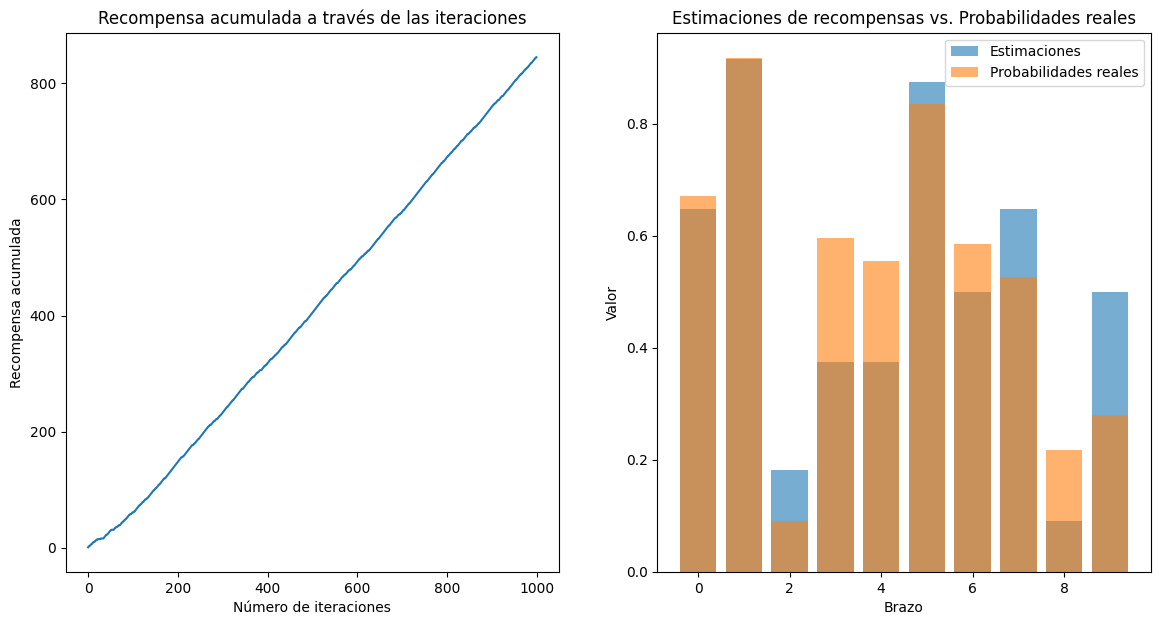


Epsilon: 0.01
Recompensa acumulada: 957


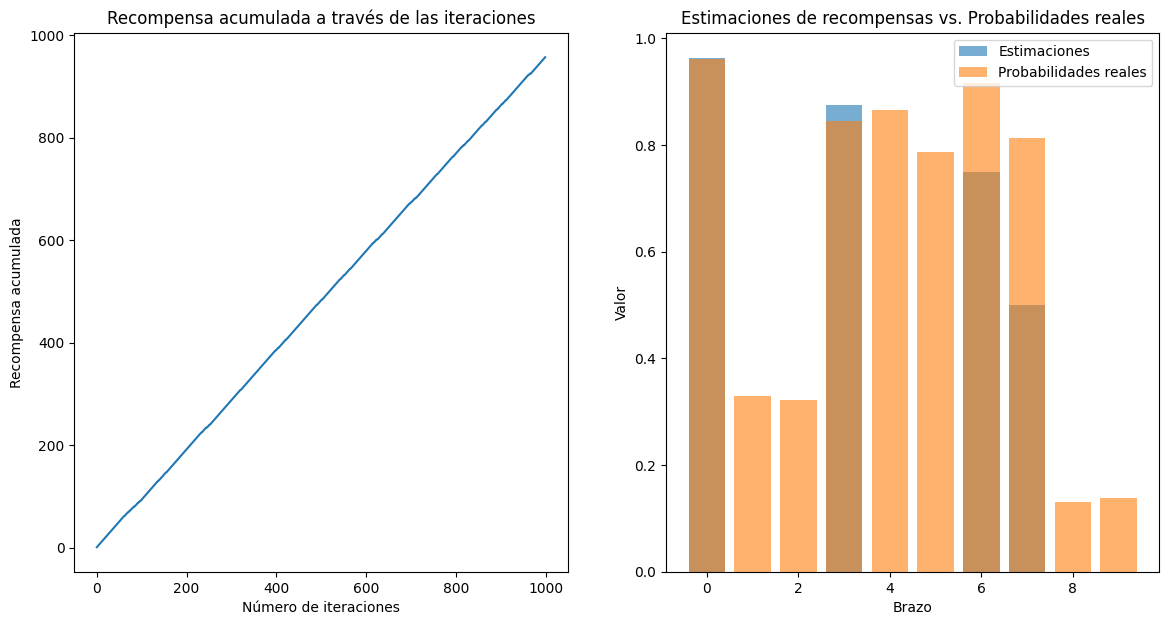


Epsilon: 0.1
Recompensa acumulada: 832


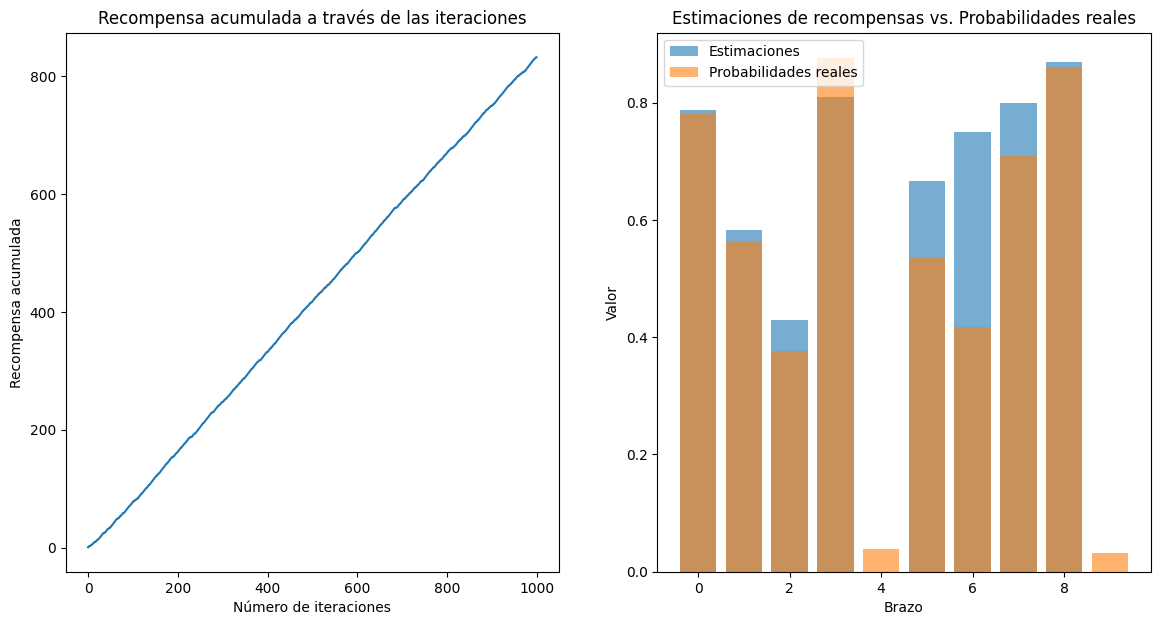


Epsilon: 0.5
Recompensa acumulada: 645


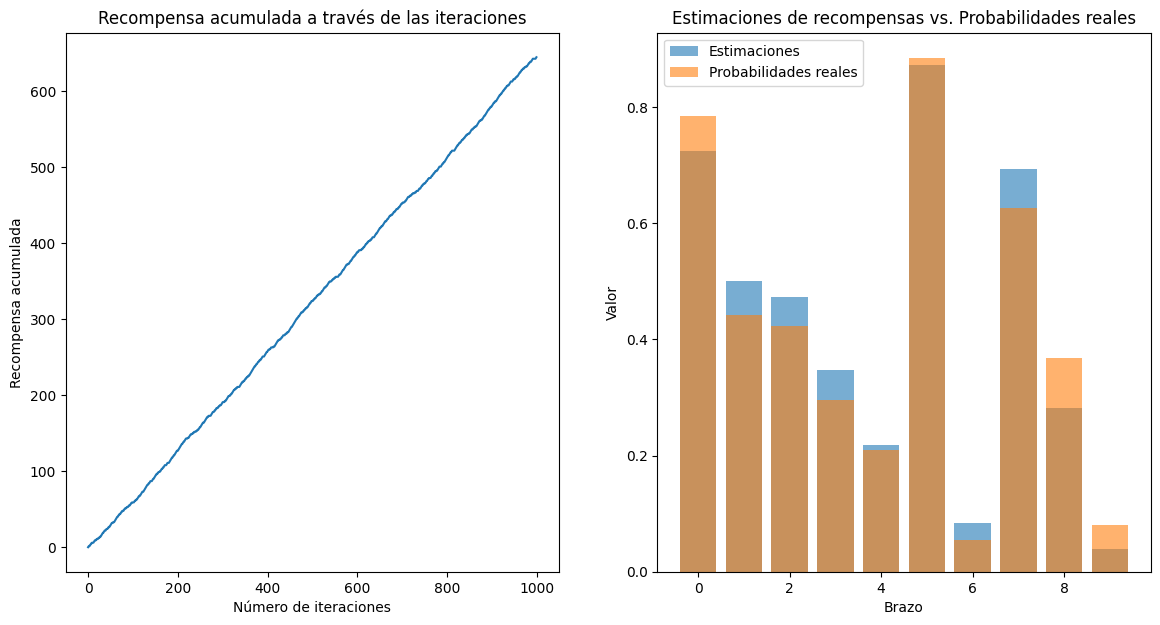

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, num_arms=10):
        self.num_arms = num_arms
        self.probabilities = np.random.rand(num_arms)
    
    def pull(self, arm):
        return 1 if np.random.rand() < self.probabilities[arm] else 0

class Agent:
    def __init__(self, epsilon, num_arms=10):
        self.epsilon = epsilon
        self.num_arms = num_arms
        self.estimates = np.zeros(num_arms)
        self.counts = np.zeros(num_arms)
        self.total_reward = 0
        self.rewards_history = []

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.num_arms)
        else:
            return np.argmax(self.estimates)
    
    def update_estimates(self, arm, reward):
        self.counts[arm] += 1
        self.estimates[arm] += (reward - self.estimates[arm]) / self.counts[arm]
        self.total_reward += reward
        self.rewards_history.append(self.total_reward)

def run_simulation(epsilon, num_iterations=1000):
    bandit = Bandit()
    agent = Agent(epsilon)
    
    for _ in range(num_iterations):
        arm = agent.select_arm()
        reward = bandit.pull(arm)
        agent.update_estimates(arm, reward)
    
    return agent, bandit

def plot_results(agent, bandit):
    plt.figure(figsize=(14, 7))

    # Recompensa acumulada
    plt.subplot(1, 2, 1)
    plt.plot(agent.rewards_history)
    plt.xlabel('Número de iteraciones')
    plt.ylabel('Recompensa acumulada')
    plt.title('Recompensa acumulada a través de las iteraciones')

    # Estimaciones vs. Probabilidades reales
    plt.subplot(1, 2, 2)
    plt.bar(range(agent.num_arms), agent.estimates, alpha=0.6, label='Estimaciones')
    plt.bar(range(agent.num_arms), bandit.probabilities, alpha=0.6, label='Probabilidades reales')
    plt.xlabel('Brazo')
    plt.ylabel('Valor')
    plt.title('Estimaciones de recompensas vs. Probabilidades reales')
    plt.legend()
    
    plt.show()

# Configuración y ejecución de la simulación
epsilon = 0.1
num_iterations = 1000
agent, bandit = run_simulation(epsilon, num_iterations)

# Imprimir la recompensa acumulada al final de la simulación
print(f"Recompensa acumulada: {agent.total_reward}")

# Graficar los resultados
plot_results(agent, bandit)

# Experimentos con diferentes valores de epsilon
epsilons = [0.01, 0.1, 0.5]
for epsilon in epsilons:
    print(f"\nEpsilon: {epsilon}")
    agent, bandit = run_simulation(epsilon, num_iterations)
    print(f"Recompensa acumulada: {agent.total_reward}")
    plot_results(agent, bandit)
